# Balance the ASAG Dataset
This notebook is to balance the ASAG dataset

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/ASAG_augmented.csv').drop(['Unnamed: 0'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        298 non-null    object 
 1   age_participant  298 non-null    int64  
 2   sex_participant  298 non-null    object 
 3   education        298 non-null    object 
 4   L1               298 non-null    object 
 5   sex_examiner1    298 non-null    object 
 6   sex_examiner2    298 non-null    object 
 7   sex_examiner3    298 non-null    object 
 8   setting          298 non-null    object 
 9   question         298 non-null    object 
 10  word_limit       298 non-null    object 
 11  level_course     298 non-null    int64  
 12  answer           298 non-null    object 
 13  grade_examiner1  298 non-null    int64  
 14  grade_examiner2  296 non-null    float64
 15  grade_examiner3  298 non-null    int64  
 16  level            298 non-null    int64  
 17  question_type   

In [4]:
# Look at the level distribution for the non-augmented data
df[df.is_augmented == 0].level.value_counts()

level
3    97
4    67
2    54
5    28
1    17
6     5
Name: count, dtype: int64

In [5]:
# Look at the level distribution for the augmented data
df[df.is_augmented == 1].level.value_counts()

level
5    28
2     2
Name: count, dtype: int64

In [6]:
# Look at the level distribution of all the data
df.level.value_counts()

level
3    97
4    67
2    56
5    56
1    17
6     5
Name: count, dtype: int64

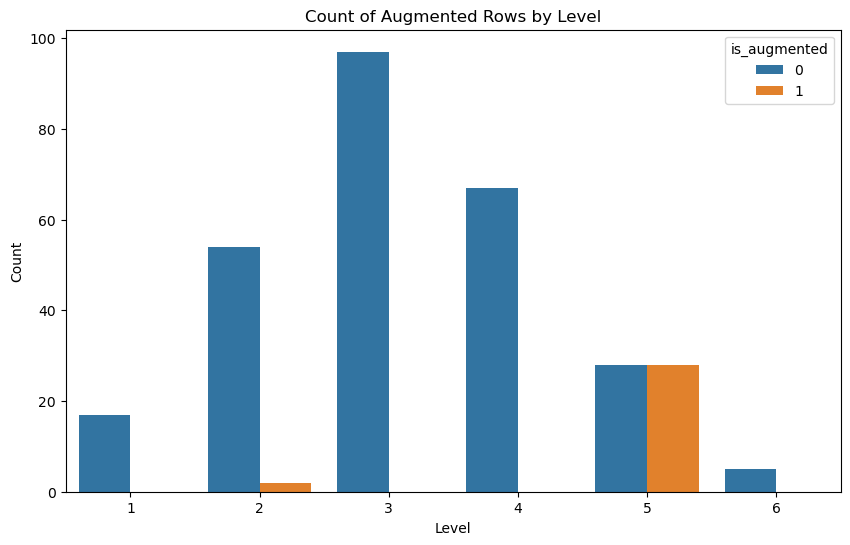

In [7]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='level', hue='is_augmented')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Count of Augmented Rows by Level')

# Display the plot
plt.show()

In [8]:
# Divide the df by levels and order them by the longest answers
level_2 = df[df.level == 2].copy()
level_5 = df[df.level == 5].copy()

level_3 = df[df.level == 3].copy()
level_3['length'] = level_3['answer'].apply(len)
level_3_sorted = level_3.sort_values(by='length', ascending=False)

level_4 = df[df.level == 4].copy()
level_4['length'] = level_4['answer'].apply(len)
level_4_sorted = level_4.sort_values(by='length', ascending=False)

In [9]:
# Define a function to conserve answer length and question variability
def select_unique_rows(df, num_answers):
    '''
    Iterates through the questions in the dataframe
    and appends the row to a new dataframe,
    only if the question is not already in the new dataframe.
    If necessary, allows for repeats by selecting the longest answers.
    '''
    # Create an empty list to store unique rows
    unique_rows = []

    # Iterate through the DataFrame
    for index, row in df.iterrows():
        # Check if the question is already in unique_df
        if row['question'] not in [r['question'] for r in unique_rows]:
            # Append the row to unique_rows
            unique_rows.append(row)
            # Check if unique_df has reached the desired length
            if len(unique_rows) == num_answers:
                break

    # If the desired number of answers has not been reached,
    # allow repeats by selecting the longest answers
    while len(unique_rows) < num_answers:
        longest_answer_row = df.loc[df['answer'].apply(len).idxmax()]
        unique_rows.append(longest_answer_row)
    
    # Convert the list of DataFrames to a DataFrame
    unique_df = pd.DataFrame(unique_rows)
    
    return unique_df

In [10]:
# Apply the function to each level
level_3_selected = select_unique_rows(level_3_sorted, 56)
level_4_selected = select_unique_rows(level_4_sorted, 56)

In [11]:
# Merge all of the dataframes and reset the index
merged_df = pd.concat([level_2, level_3_selected, level_4_selected, level_5]).reset_index(drop=True)
# Drop the length column that had been added only for the purpose of the function
merged_df = merged_df.drop(['length'],axis=1)

In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   file_name        224 non-null    object 
 1   age_participant  224 non-null    int64  
 2   sex_participant  224 non-null    object 
 3   education        224 non-null    object 
 4   L1               224 non-null    object 
 5   sex_examiner1    224 non-null    object 
 6   sex_examiner2    224 non-null    object 
 7   sex_examiner3    224 non-null    object 
 8   setting          224 non-null    object 
 9   question         224 non-null    object 
 10  word_limit       224 non-null    object 
 11  level_course     224 non-null    int64  
 12  answer           224 non-null    object 
 13  grade_examiner1  224 non-null    int64  
 14  grade_examiner2  222 non-null    float64
 15  grade_examiner3  224 non-null    int64  
 16  level            224 non-null    int64  
 17  question_type   

In [13]:
# Look at the level distribution after the data selection
merged_df.level.value_counts()

level
2    56
3    56
4    56
5    56
Name: count, dtype: int64

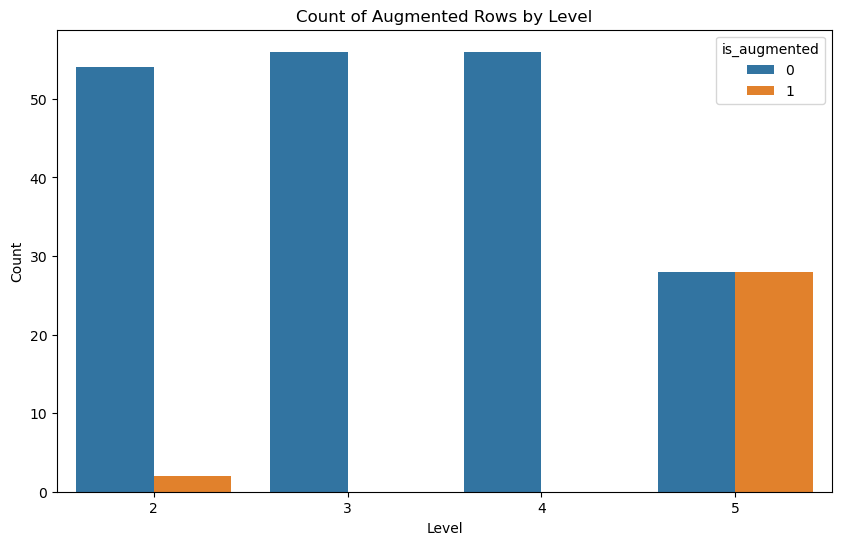

In [14]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='level', hue='is_augmented')

# Add labels and title
plt.xlabel('Level')
plt.ylabel('Count')
plt.title('Count of Augmented Rows by Level')

# Display the plot
plt.show()

In [15]:
merged_df.to_csv('../data/ASAG_balanced.csv')